# How do stats stabilize?
## Week 2: The Season So Far
### MSP, 5.21.2017

In [1]:
from IPython.display import HTML
HTML('''<script>code_show=true; function code_toggle() { if (code_show){ $('div.input').hide();} else { $('div.input').show(); } code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# boilerplate imports

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from random import randrange
import scipy.stats as sst

import pandas as pd
from StringIO import StringIO


In [35]:
L = pd.read_csv("data/Lemahieu2017.csv", quotechar='"', skipinitialspace=True,na_values='null')
S = pd.read_csv("data/Smoak2017.csv",quotechar='"',skipinitialspace=True,na_values='null')
J = pd.read_csv("data/Judge2017.csv",quotechar='"',skipinitialspace=True,na_values='null')

T = pd.read_csv("data/Twins2017.csv",quotechar='"',skipinitialspace=True,na_values='null')

In [76]:
Twins_players = np.unique(T['player_name'])

print('{0:^16s} {1:>6s} {2:>6s} {3:>5s}'.format('Player','Mean','std','Max'))

for p in Twins_players:
    w = np.where(T['player_name']== p)
    pitches_per_pa = np.ediff1d( np.where(T['des'].values[w] >= 0.0)[0])
    print('{0:16s} {1:>6.2f} {2:>6.2f} {3:>5d}'.format(p,np.mean(pitches_per_pa),np.std(pitches_per_pa),np.max(pitches_per_pa)))
    #print np.min(pitches_per_pa)
    

     Player        Mean    std   Max
Brian Dozier       3.96   1.78    10
Byron Buxton       4.07   1.80     8
Chris Gimenez      3.79   2.11     9
Danny Santana      3.52   1.98     7
Eddie Rosario      3.85   1.89    10
Eduardo Escobar    4.44   2.02    10
Ehire Adrianza     4.08   1.98     8
Jason Castro       4.03   1.91     8
Joe Mauer          4.11   1.70     8
Jorge Polanco      3.76   2.02    11
Kennys Vargas      3.95   1.59     7
Max Kepler         3.97   1.76     8
Miguel Sano        4.25   1.89    10
Robbie Grossman    4.11   2.00     9


In [81]:
#print L['sv_id'] # this is definitely pitch timing
pitches_per_pa = np.ediff1d(np.where(L['des'].values >= 0.0)[0]); print 'Lemahieu P/PA:',np.mean(pitches_per_pa)

pitches_per_pa = np.ediff1d(np.where(L['des'].values >= 0.0)[0]); print 'Smoak P/PA:',np.mean(pitches_per_pa)

pitches_per_pa = np.ediff1d(np.where(L['des'].values >= 0.0)[0]); print 'Judge P/PA:', np.mean(pitches_per_pa)



Lemahieu P/PA: 3.86772486772
Smoak P/PA: 3.86772486772
Judge P/PA: 3.86772486772


In [16]:
#pd.value_counts(L['launch_speed'])

def check_convergence(data,field='launch_speed',nbins=10,rrange=(30.,120.),title='',xlab=''):

    l_arr = (data[field].values)[np.where(data[field].values >= 0.0)]


    hist, bin_edges = np.histogram(l_arr,bins=nbins,density=True,range=rrange)

    fig = plt.figure(figsize=(3,2))
    ax = fig.add_subplot(111)
    ax.plot(bin_edges[0:-1],hist,color='black')
    ax.set_xlabel(xlab,size=16)
    ax.set_ylabel('Frequency',size=16)
    ax.set_title(title,size=16)

    for j,clr in enumerate(['blue','gray']):

        scatter_range = np.zeros([2,hist.size])
        a = np.random.choice(l_arr,int(l_arr.size/((j+2.)**2.)))
        scatter_range[0],bin_edges = np.histogram(a,bins=nbins,density=True,range=rrange)
        scatter_range[1] = scatter_range[0]

        for i in range(0,100):
            a = np.random.choice(l_arr,int(l_arr.size/(j+2.)**2.))
            hist, bin_edges = np.histogram(a,bins=nbins,density=True,range=rrange)
            scatter_range[0] = np.min(np.array([scatter_range[0],hist]),axis=0)
            scatter_range[1] = np.max(np.array([scatter_range[1],hist]),axis=0)


        ax.fill_between(bin_edges[0:-1],scatter_range[0],scatter_range[1],color=clr,alpha=0.5)



    for label in ax.get_xticklabels(): label.set_rotation(30); label.set_horizontalalignment("center")




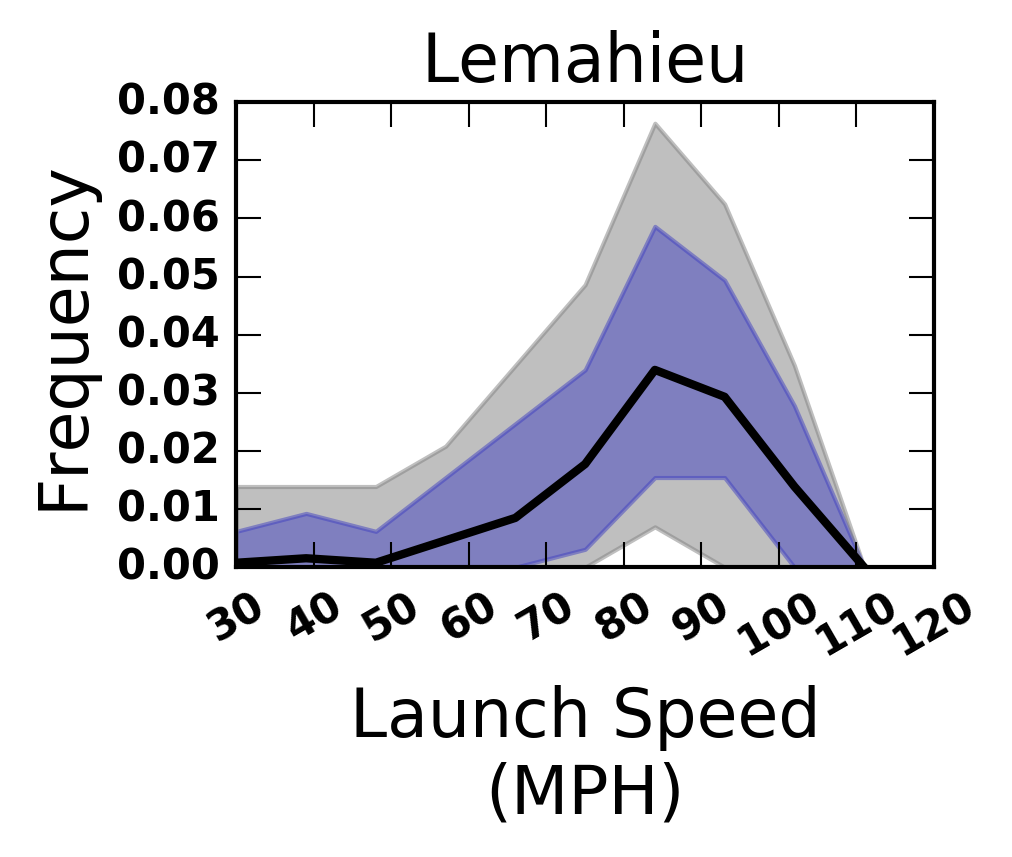

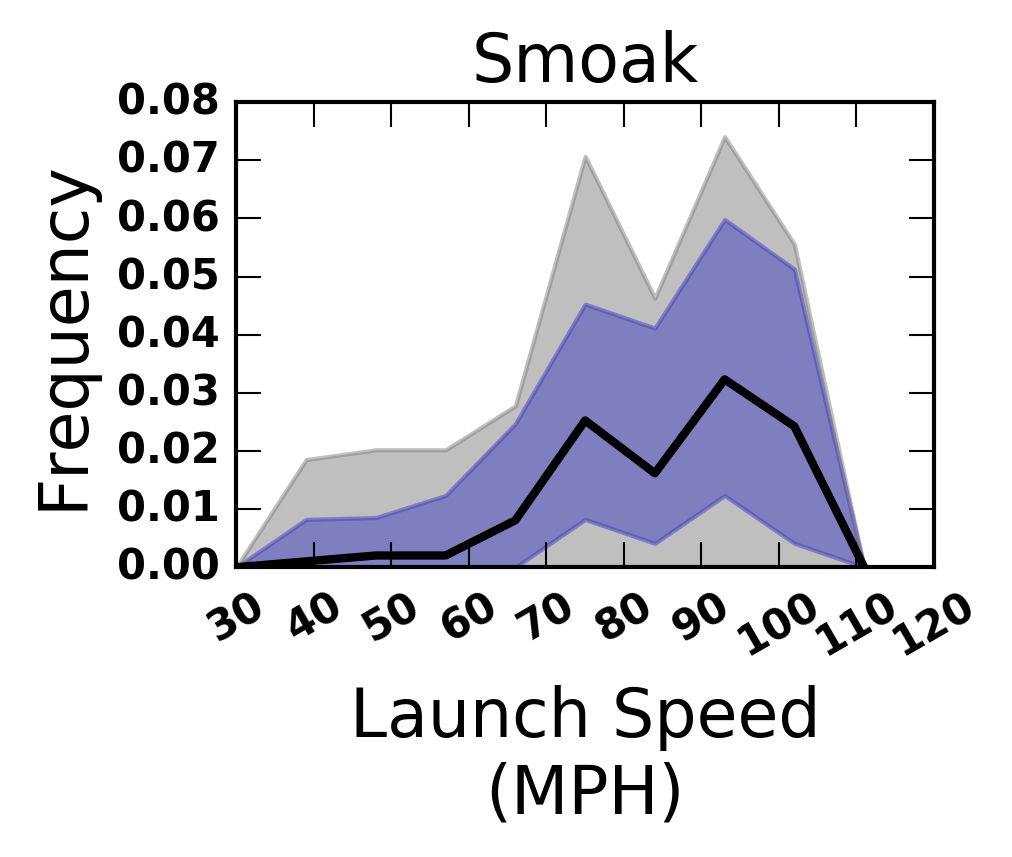

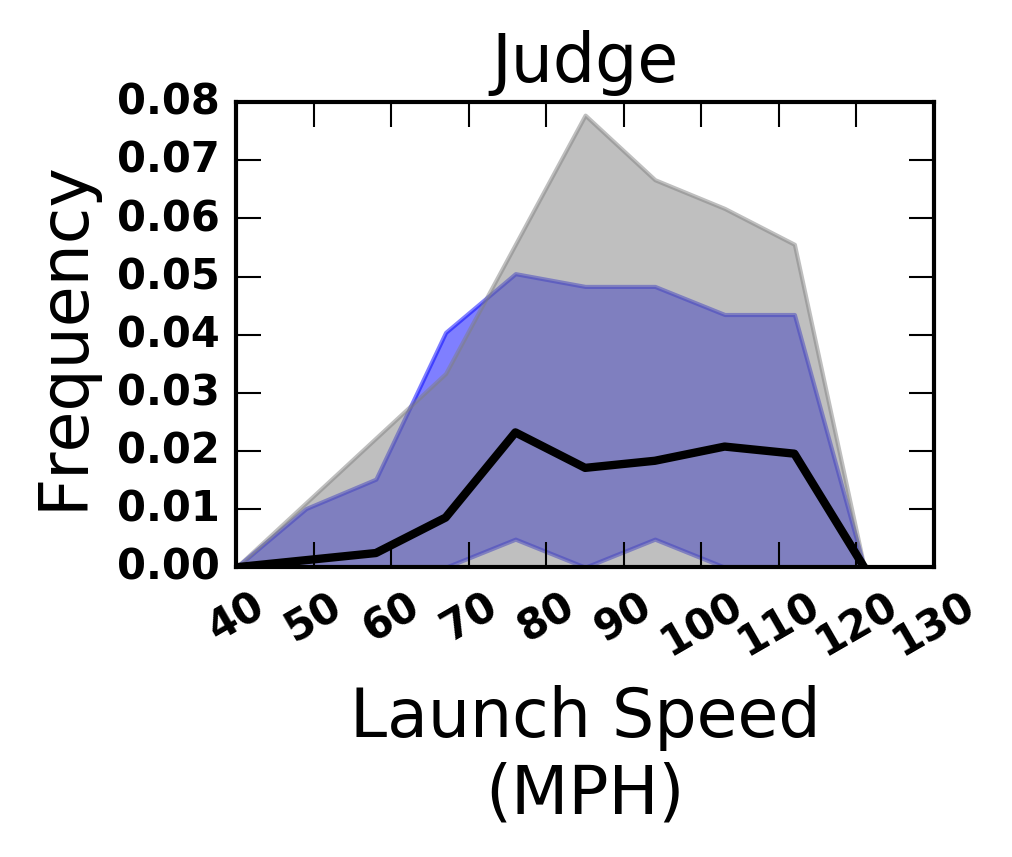

In [64]:
check_convergence(L,title='Lemahieu',xlab='Launch Speed\n(MPH)')

check_convergence(S,title='Smoak',xlab='Launch Speed\n(MPH)')
check_convergence(J,title='Judge',xlab='Launch Speed\n(MPH)',rrange=(40.,130.))

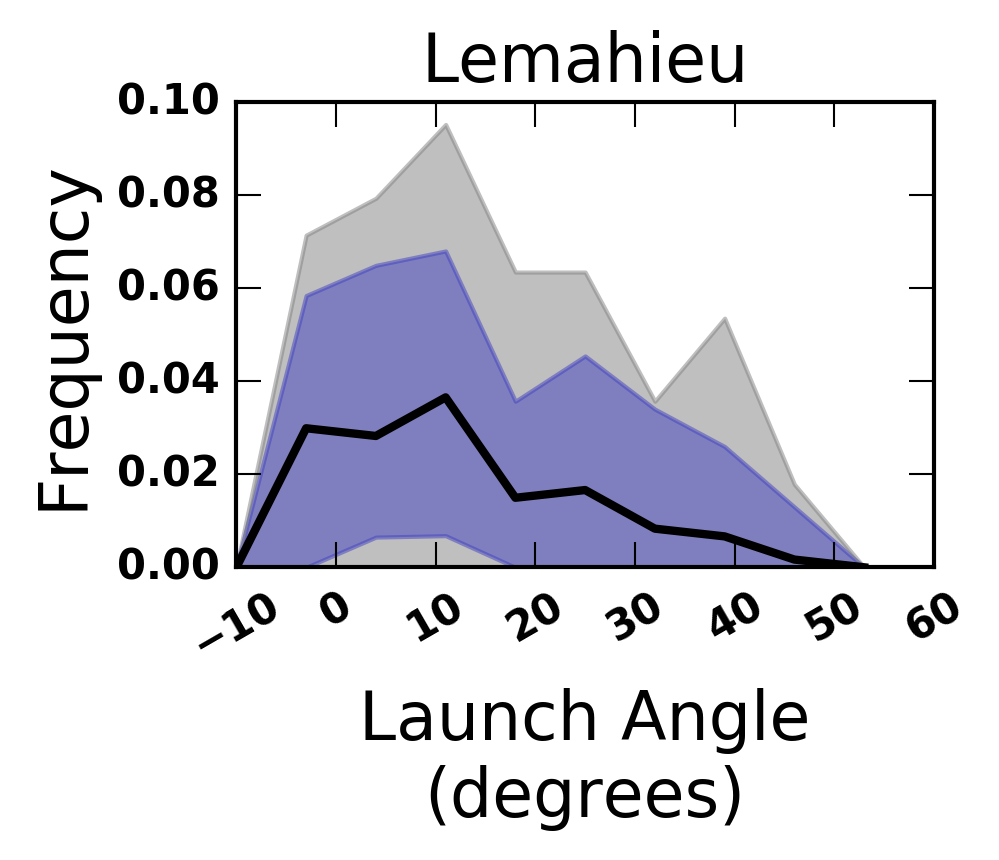

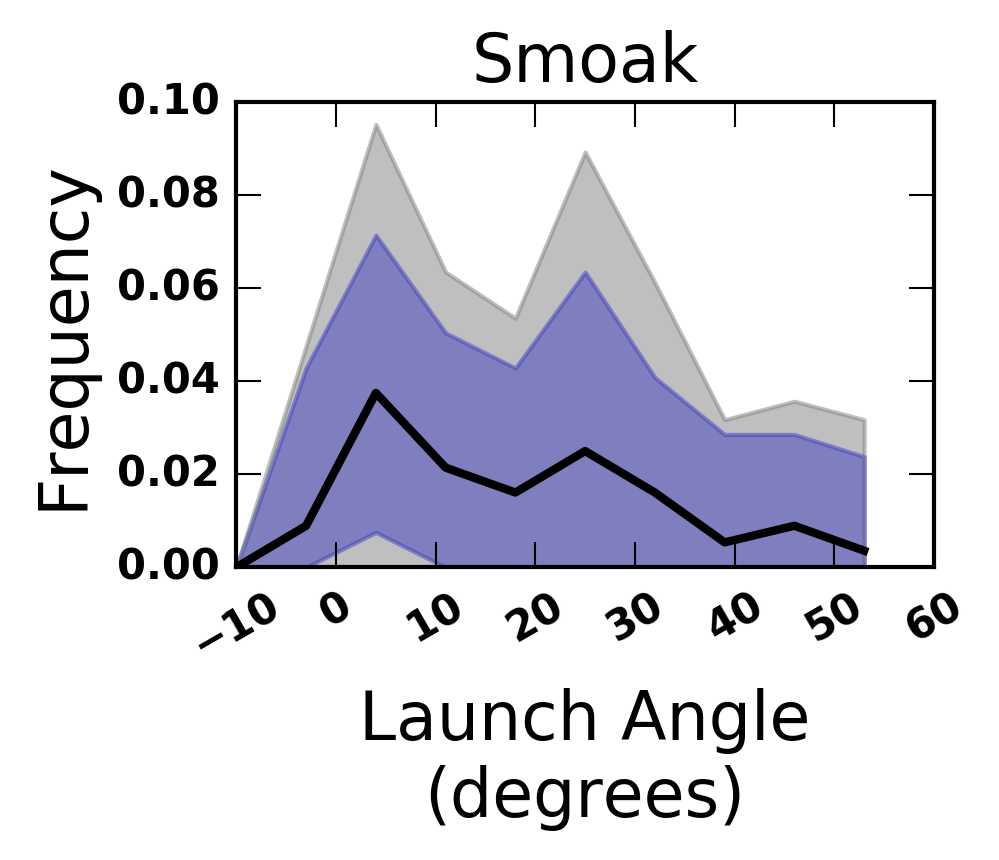

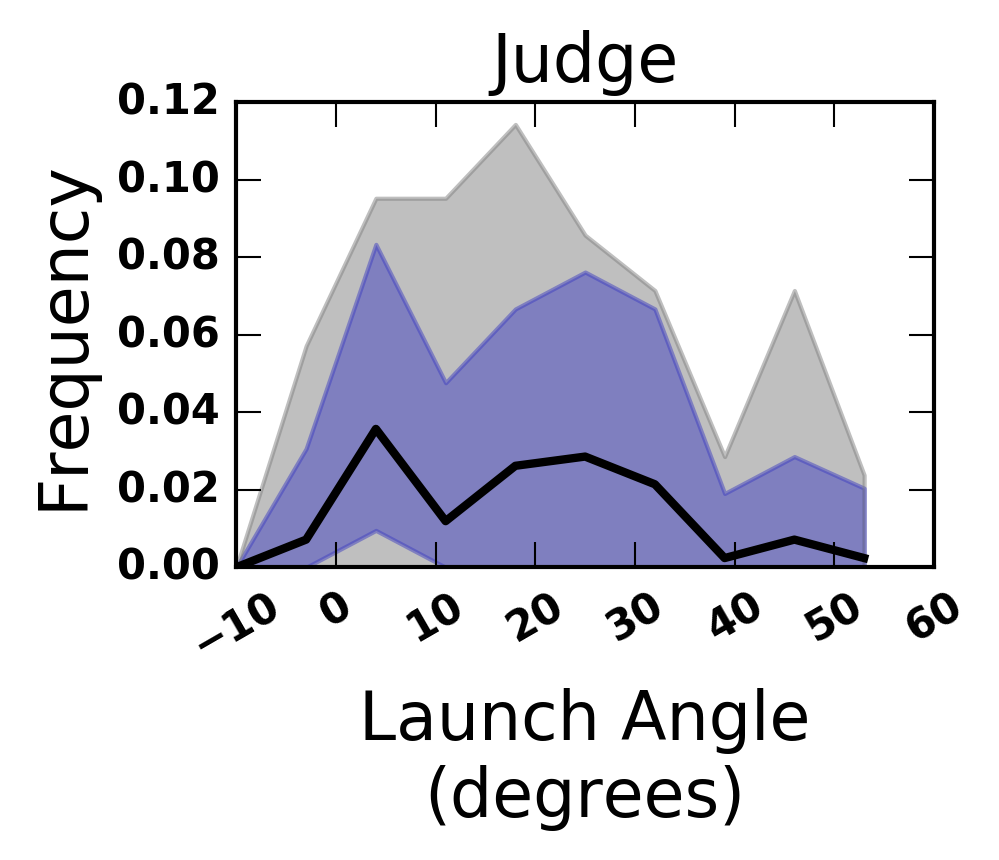

In [26]:
check_convergence(L,field='launch_angle',title='Lemahieu',xlab='Launch Angle\n(degrees)',rrange=(-10,60))
check_convergence(S,field='launch_angle',title='Smoak',xlab='Launch Angle\n(degrees)',rrange=(-10,60))

check_convergence(J,field='launch_angle',title='Judge',xlab='Launch Angle\n(degrees)',rrange=(-10,60))

#check_convergence(S,title='Smoak',xlab='Launch Speed\n(MPH)')
#check_convergence(J,title='Judge',xlab='Launch Speed\n(MPH)')

In [21]:
# L is in order of pitches. difference between numbers is seconds between pitches.
#print L['sv_id'].values

time_arr = np.zeros(len(L['des']))

for indx,i in enumerate(L['sv_id']):
    time_arr[indx] = float(i[7:14])
    
print time_arr